In [23]:
#Importing the necessary packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [24]:
#loading the data set
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
# Preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0


In [26]:
print("Number of Training images:",len(train_images))
print("Number of Testing images:",len(test_images))

Number of Training images: 60000
Number of Testing images: 10000


In [27]:
# Create a simple CNN model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
print(model)

In [29]:
# Train the model
model.fit(train_images, train_labels, epochs=5)
# Save the model
model.save('my_model.keras')

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2948 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1423 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1089 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0900 - accuracy: 0.9718
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - accuracy: 0.9768


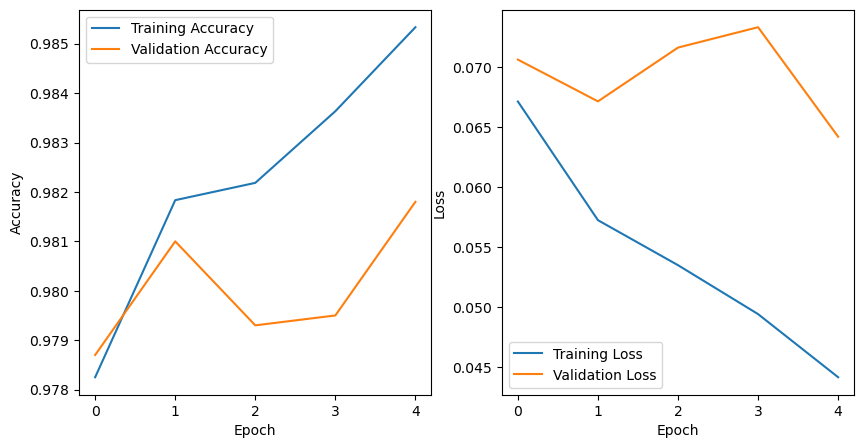

In [30]:

# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



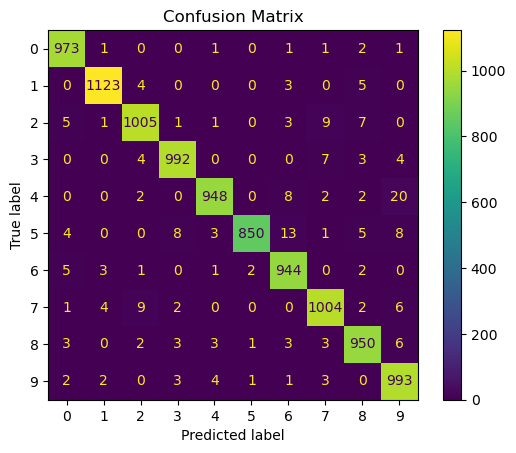

In [31]:
# Create a confusion matrix
test_predictions = np.argmax(predictions, axis=1)
confusion = confusion_matrix(test_labels, test_predictions)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion, display_labels=np.arange(10)).plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


In [32]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.9760
Test accuracy: 0.9760000109672546


In [33]:
# Make predictions and display the predicted digit
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


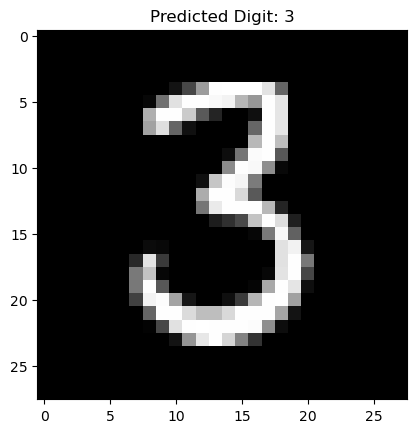

In [34]:
# Choose a random test image for display
index = np.random.randint(0, len(test_images))
sample_image = test_images[index]
predicted_label = np.argmax(predictions[index])

# Display the image and the predicted digit
plt.figure()
plt.imshow(sample_image, cmap='gray')
plt.title(f'Predicted Digit: {predicted_label}')
plt.show()

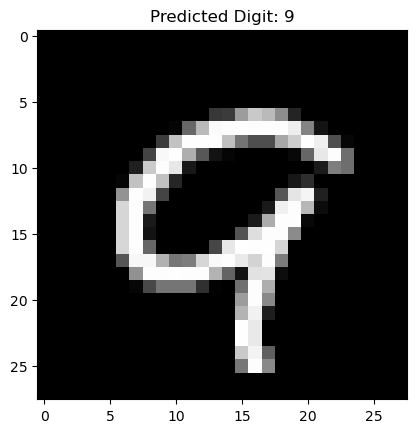

In [36]:
# Choose a random test image for display
index = np.random.randint(0, len(test_images))
sample_image = test_images[index]
predicted_label = np.argmax(predictions[index])

# Display the image and the predicted digit
plt.figure()
plt.imshow(sample_image, cmap='gray')
plt.title(f'Predicted Digit: {predicted_label}')
plt.show()